Question 1: The Digits dataset consists of 1,797 images, each 8x8 pixels in size, representing handwritten digits from 0 to 9. Each pixel has an intensity value ranging from 0 to 16. Your goal is to implement and evaluate a
Random Forest Classifier to categorize each image into one of the ten digit classes.
Objective:
You are tasked with developing a machine learning model using a Random Forest Classifier to classify digit images. You will evaluate the performance of your model using accuracy metrics and a comprehensive classification report.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Max pixel value: 255
Min pixel value: 0
Accuracy: 0.9664666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1495
           1       0.99      0.98      0.98      1649
           2       0.95      0.97      0.96      1471
           3       0.96      0.95      0.95      1518
           4       0.97      0.97      0.97      1443
           5       0.96      0.96      0.96      1383
           6       0.98      0.98      0.98      1482
           7       0.97      0.96      0.97      1635
           8       0.96      0.95      0.96      1445
           9       0.95      0.95      0.95      1479

    accuracy                           0.97     15000
   macro avg       0.97      0.97      0.97     15000
weighted avg       0.97      0.97      0.97     15000



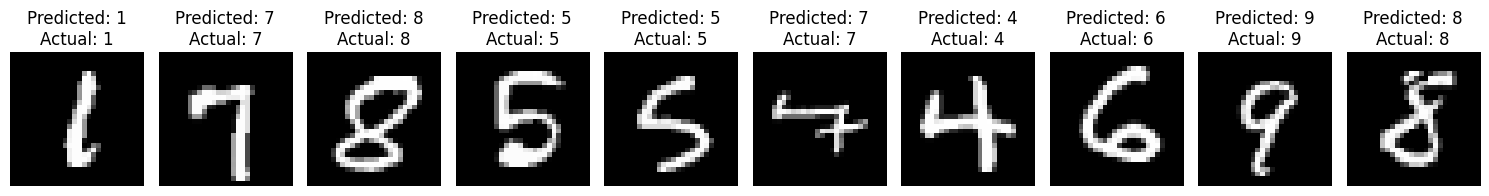

In [ ]:
#Required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

# 1: Dataset loading and extrapolation

#loading data set
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#image dimensions and pixel ranges
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print("Max pixel value:", X_train.max())
print("Min pixel value:", X_train.min())

#Data prep and splittling
#flatten image data to prep for Random Forest Classification
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
#split data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

#model training
#Initialize a Random Forest Classifier with the following parameters: n_estimators=100 (number of trees), criterion='gini', random_state=42
rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
#Train the Random Forest model using the training dataset.
rf.fit(X_train, y_train)

#model evaluation
# Predict the digit labels for the test dataset using your trained Random Forest model.
y_pred = rf.predict(X_test)
# Compute the accuracy of your predictions. Discuss what this accuracy indicates regarding model effectiveness.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# accuracy here is 96.64%, meaning the Random Forest Classifier correctly predicts the digit in 96.64% of the test cases.
#Generate and display a detailed classification report including precision, recall, and F1-score metrics for each digit class.
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

#visualization
# Select a subset of the test dataset images and visualize them. For each visualized image, include the predicted digit label and the actual digit label.
# Ensure visualizations are clearly labeled, include no axis ticks, and clearly differentiate between predicted and actual labels.

# choose 10 images for subplot
num_images = 10
#randomly choose them
indices = np.random.choice(len(X_test), num_images, replace=False)
#reshape back into original image size
selected_images = X_test[indices].reshape(num_images, 28, 28)
selected_labels = y_test[indices]
predicted_labels = y_pred[indices]

# create subplots for the images and image labels
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
for i, ax in enumerate(axes):
    # shows image in grayscale
    ax.imshow(selected_images[i], cmap='gray')
    # shows the predicted and actual labels
    ax.set_title(f"Predicted: {predicted_labels[i]}\nActual: {selected_labels[i]}")
    # remove axis ticks
    ax.axis('off')

#actually displays
plt.tight_layout()
plt.show()



Question 2: The objective is to provide you with hands-on experience using K-means clustering, a fundamental unsupervised learning algorithm, and to identify the optimal number of clusters using the Elbow Method.

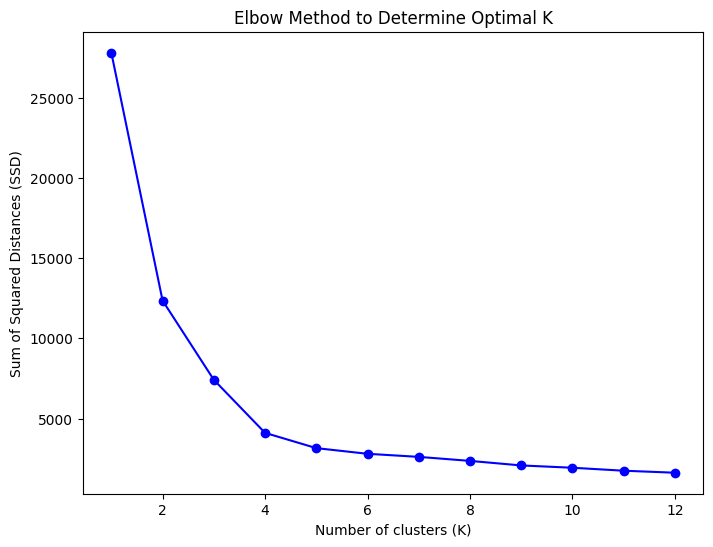

In [ ]:
# Data Generation
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#Use the sklearn.datasets.make_blobs function to generate a synthetic dataset with the following characteristics: Number of samples: 400, Number of features: 2 (to easily visualize clusters),
# Number of clusters: 5, Standard deviation of clusters (cluster_std): 2.0, Random state: 100 (for reproducibility)
X, y = make_blobs(n_samples=400, n_features=2, centers=5, cluster_std=2.0, random_state=100)

# K-means Clustering Implementation:
# Apply the K-means clustering algorithm (sklearn.cluster.KMeans) to the dataset generated above. Run the algorithm for different numbers of clusters, varying from 1 to 12.
# Calculating Sum of Squared Distances (SSD):
# For each iteration (from 1 to 12 clusters), calculate the sum of squared distances (SSD), also known as inertia, to evaluate the compactness of each clustering scenario. Store
# these values clearly for subsequent analysis.
# Elbow Method Visualization and Analysis:
# Plot the SSD values against the number of clusters (from 1 to 12). Clearly label your axes and the plot title. Using the plot, identify and explain the "elbow point"—the number
# of clusters after which the reduction in SSD becomes minimal, indicating an optimal clustering solution.
# will make function to run all of these steps as many times as needed so can call it on 12 at the end
def kmeans_clustering_and_elbowing_method(X, num_clusters):
  ssd = [] #empty list to store sum of squared differences for each K value
  K_range = range(1, num_clusters + 1) #range of K values to test

  for K in K_range:
    # Initialize and fit K-means model with current K
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X)

    # append ssd (intertia) to the list
    ssd.append(kmeans.inertia_)

  # Plotting the results
  # The Elbow plot helps to determine the optimal number of
  # clusters by identifying the point where SSD begins to decrease linearly
  plt.figure(figsize=(8, 6))
  # 'bo-' means blue solid line with circle as points
  plt.plot(K_range, ssd, 'bo-')
  plt.xlabel('Number of clusters (K)')
  plt.ylabel('Sum of Squared Distances (SSD)')
  plt.title('Elbow Method to Determine Optimal K')
  plt.show()

kmeans_clustering_and_elbowing_method(X, 12)
# elbow plot shows that the optimal number of clusters is more than likely 5 or 4.



Question 3: Use the Olivetti Faces dataset, a collection of 400 grayscale face images from 40 distinct individuals, with 10 images per person. Each image is of size 64x64 pixels.

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Min pixel value: 0.0
Max pixel value: 1.0


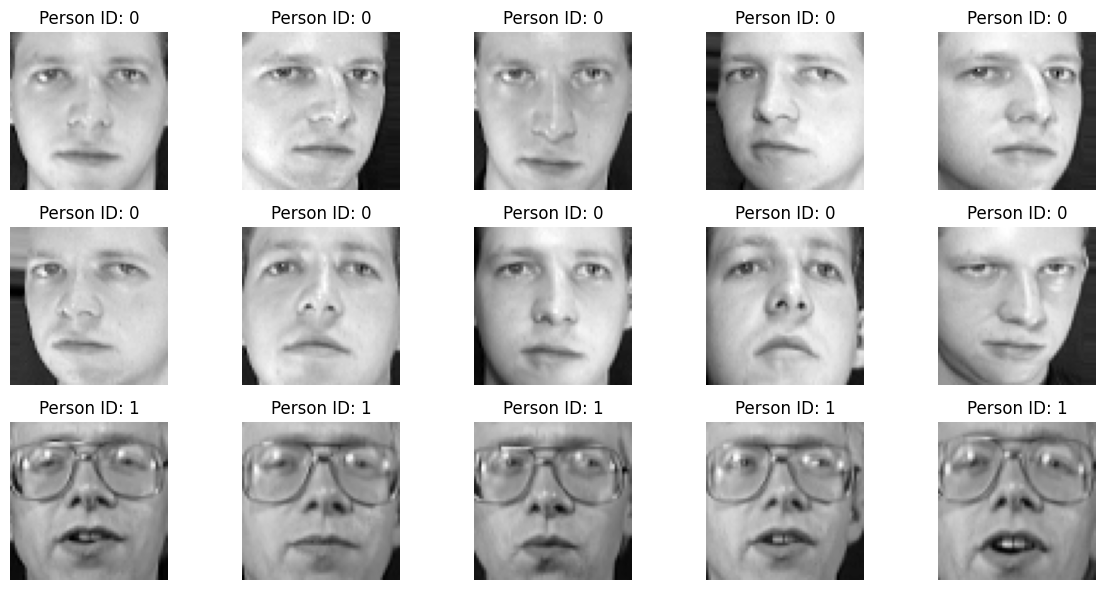

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.0178 - loss: 4.4642 - val_accuracy: 0.0125 - val_loss: 3.8661
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0160 - loss: 3.8336 - val_accuracy: 0.0250 - val_loss: 3.6944
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0421 - loss: 3.7044 - val_accuracy: 0.0375 - val_loss: 3.6930
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0147 - loss: 3.6830 - val_accuracy: 0.0250 - val_loss: 3.6894
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0354 - loss: 3.6745 - val_accuracy: 0.0000e+00 - val_loss: 3.6862
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0345 - loss: 3.6701 - val_accuracy: 0.0250 - val_loss: 3.7029
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0303 - loss: 3.6587 - val_accuracy: 0.0000e+00 - val_loss: 3.6842
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0130 - loss: 3.6535 - val_accuracy: 0.0000e+0

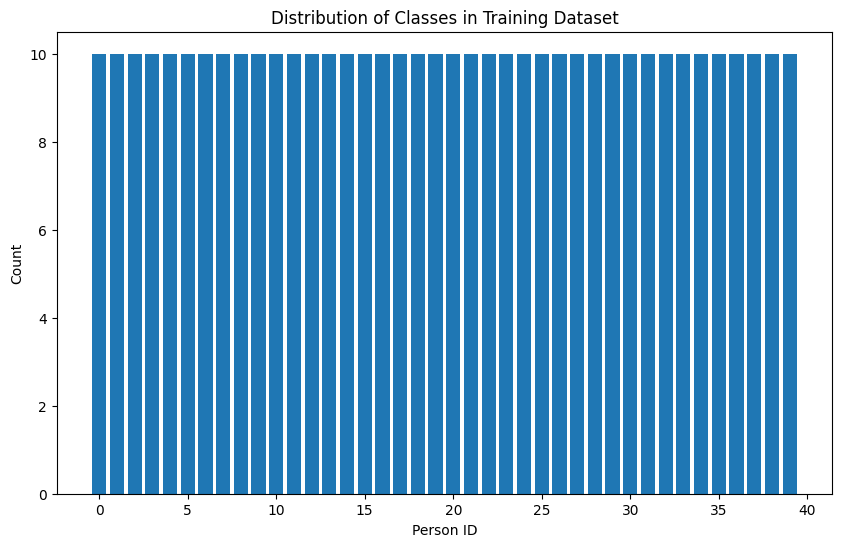

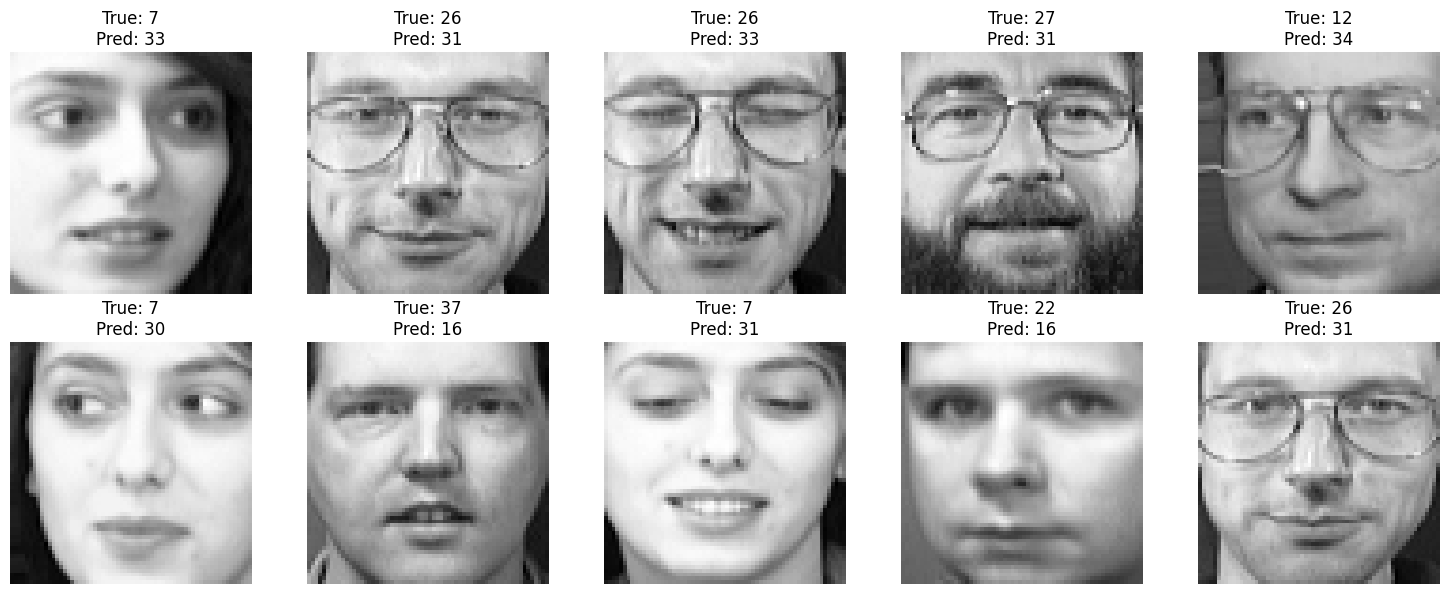

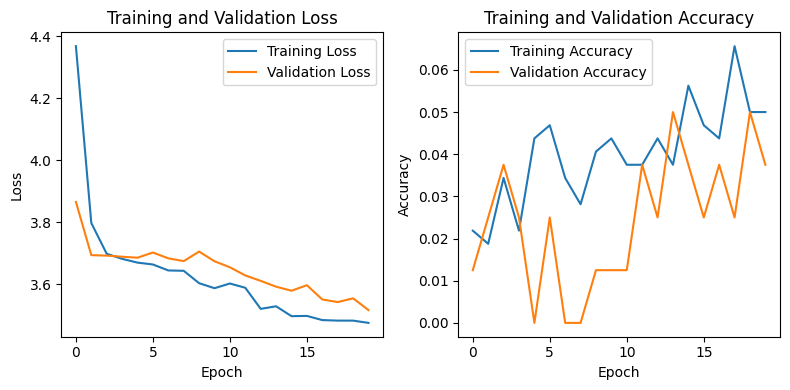

In [1]:
#Loading and preprocessing data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
#Load the Olivetti Faces dataset using scikit-learn (sklearn.datasets.fetch_olivetti_faces)
faces = datasets.fetch_olivetti_faces()
X = faces.images
y = faces.target
#Normalize pixel values in the dataset by scaling them between 0 and 1
X = X / np.max(X)
print("Min pixel value:", X.min())
print("Max pixel value:", X.max())
#Split the dataset into training and testing subsets (80% training, 20% testing).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Data exploration
#Visualize the first 15 face images using Matplotlib, displaying the corresponding labels (person ID).
#setting up plot
fig, axes = plt.subplots(3, 5, figsize=(12,6))
#plotting first 15
for i, ax in enumerate(axes.flat):
  ax.imshow(X[i], cmap='gray')
  ax.set_title(f"Person ID: {y[i]}")
  ax.axis('off')
plt.tight_layout()
plt.show()
#Generate and plot a bar chart showing the distribution of the different individuals/classes in the training dataset.
unique_classes, class_counts = np.unique(y, return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(unique_classes, class_counts)
plt.xlabel('Person ID')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Dataset')

#Building the Neural Network Model
# Construct a neural network using the Sequential API in Keras with the following layers:
model = Sequential([
    # Flatten layer to reshape 64x64 input images into 1D arrays.
    Flatten(input_shape=(64,64)),
    # Dense layer with 256 neurons and ReLU activation.
    Dense(256, activation='relu'),
    # Dropout layer with a dropout rate of 0.5.
    tf.keras.layers.Dropout(0.5),
    # Dense layer with 128 neurons and ReLU activation.
    Dense(128, activation='relu'),
    # Dense layer with 40 neurons (one neuron per class/person) and softmax activation for classification.
    Dense(40, activation='softmax')
])

#Model compilation
# Compile the neural network model using:
# Optimizer: Adam
# Loss function: sparse_categorical_crossentropy
# Metrics: accuracy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Training the Model
#Train the compiled model on the training data for 20 epochs.
# Validate the model using the test data.
# Store training and validation performance metrics in a history object.
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

#Model Evaluation and Visualization:
#Evaluate the trained model's performance on the test dataset and print out the test loss and accuracy.
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
# Visualize predictions by plotting some test images with their true labels and predicted labels.
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

num_images = 10
indices = np.random.choice(len(X_test), num_images, replace=False)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flat

for i, idx in enumerate(indices):
    axes[i].imshow(X_test[idx], cmap='gray')
    true_label = y_test[idx]
    pred_label = y_pred[idx]
    axes[i].set_title(f"True: {true_label}\nPred: {pred_label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()
# Plot graphs displaying: Training vs. validation accuracy across epochs. Training vs. validation loss across epochs.
# Plotting training and validation loss
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



Question 4: You will develop and train a basic Convolutional Neural Network (CNN) model to classify handwritten digit images from the MNIST dataset. The MNIST dataset consists of 70,000 grayscale images of handwritten digits (0-9), each image being 28x28 pixels.

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
y_train shape: (60000,)
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9020 - loss: 0.3196 - val_accuracy: 0.9827 - val_loss: 0.0615
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9848 - loss: 0.0468 - val_accuracy: 0.9817 - val_loss: 0.0583
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9898 - loss: 0.0311 - val_accuracy: 0.9888 - val_loss: 0.0402
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9937 - loss: 0.0205 - val_accuracy: 0.9903 - val_loss: 0.0358
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9954 - loss: 0.0154 - val_accuracy: 0.9871 - val_loss: 0.0468
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9968 - loss: 0.0095 - val_accuracy: 0.9870 - val_loss: 0.0488
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9971 - loss: 0.0092 - val_accuracy: 0.9896 - val_loss: 0.041

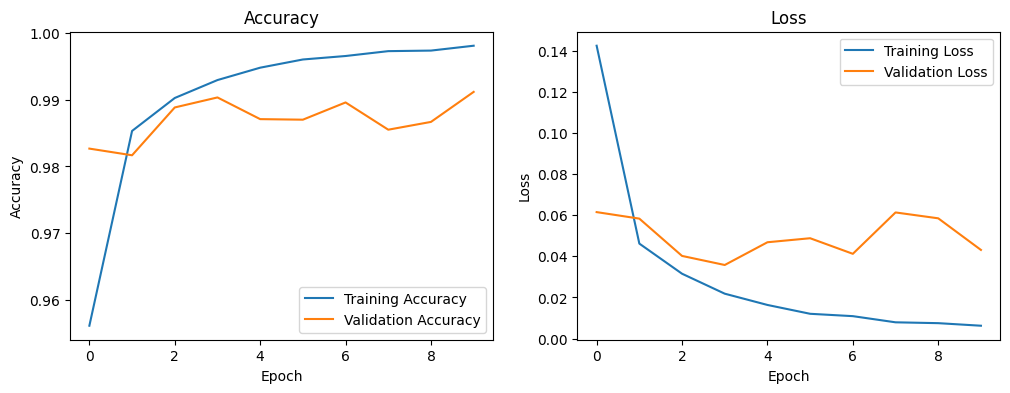

In [2]:
#Dataset preperation
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#Load the MNIST dataset using a standard deep learning library (e.g., TensorFlow or PyTorch). Normalize pixel values and split the dataset into training and test subsets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to include channel dimension (grayscale = 1 channel)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)

#CNN Architecture:
#Define a simple CNN model with the following layers
model = Sequential([
    # Convolutional layer (32 filters, kernel size 3x3, activation ReLU)
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # MaxPooling layer (pool size 2x2)
    MaxPooling2D((2, 2)),
    # Second convolutional layer (64 filters, kernel size 3x3, activation ReLU)
    Conv2D(64, (3, 3), activation='relu'),
    # Second MaxPooling layer (pool size 2x2)
    MaxPooling2D((2, 2)),
    # Flatten layer
    Flatten(),
    # Fully connected dense layer (128 neurons, activation ReLU)
    Dense(128, activation='relu'),
    # Output layer (10 neurons corresponding to digits 0-9, activation Softmax)
    Dense(10, activation='softmax')
])

#Compilation:
#Compile the CNN model using an appropriate optimizer (e.g., Adam), loss function (categorical cross-entropy), and accuracy as the evaluation metric.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Training:
#Train the CNN for at least 10 epochs with an appropriate batch size (e.g., 32 or 64).
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
# Record the training and validation accuracy and loss metrics.

#Evaluation
# Evaluate the trained model on the test dataset and report the final accuracy.
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

#Visualization:
# Plot the training and validation accuracy and loss over epochs to visualize the training progress.
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


